
# 🧠 Reconnaissance de Fruits avec KNN et Régression Linéaire

Ce projet a pour objectif de comparer deux algorithmes de machine learning sur la tâche de reconnaissance de fruits à partir d'images du dataset **Fruits 360** :
- K-Nearest Neighbors (KNN)
- Régression linéaire multiclasse

---


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
from PIL import Image
from tqdm import tqdm


## 📥 Chargement du Dataset (Fruits 360)

In [3]:

# Exemple de chemin : dataset/fruits-360/Training
# À adapter selon l'organisation de vos fichiers
# 📌 3. Télécharger le dataset
!git clone https://github.com/Horea94/Fruit-Images-Dataset.git

def load_images_from_folder(folder, image_size=(100, 100), max_per_class=200):
    images = []
    labels = []
    for class_name in os.listdir(folder):
        class_path = os.path.join(folder, class_name)
        if not os.path.isdir(class_path):
            continue
        for i, img_name in enumerate(os.listdir(class_path)):
            if i >= max_per_class:
                break
            img_path = os.path.join(class_path, img_name)
            try:
                img = Image.open(img_path).resize(image_size)
                img = np.array(img)
                images.append(img)
                labels.append(class_name)
            except:
                continue
    return np.array(images), np.array(labels)

# Exemple d'utilisation
X, y = load_images_from_folder("Fruit-Images-Dataset/Training", image_size=(64, 64))
print("Shape X:", X.shape)
print("Shape y:", y.shape)


Cloning into 'Fruit-Images-Dataset'...
remote: Enumerating objects: 385861, done.
remote: Counting objects: 100% (8696/8696), done.
remote: Compressing objects: 100% (8662/8662), done.
remote: Total 385861 (delta 39), reused 8687 (delta 34), pack-reused 377165 (from 1)
Receiving objects: 100% (385861/385861), 2.10 GiB | 31.86 MiB/s, done.
Resolving deltas: 100% (1199/1199), done.
Updating files: 100% (90503/90503), done.
Shape X: (26200, 64, 64, 3)
Shape y: (26200,)


## 🧹 Prétraitement

In [6]:

# Normalisation et encodage des labels
X_flat = X.reshape(X.shape[0], -1) / 255.0
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Réduction de dimension (facultative)
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_flat)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_encoded, test_size=0.2, random_state=42)


## 📊 Modèle 1 : KNN

KNN Accuracy: 0.9952290076335878
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00        39
 Apple Crimson Snow       0.97      1.00      0.99        36
     Apple Golden 1       1.00      1.00      1.00        31
     Apple Golden 2       1.00      1.00      1.00        48
     Apple Golden 3       0.98      1.00      0.99        47
 Apple Granny Smith       0.98      1.00      0.99        47
    Apple Pink Lady       0.98      1.00      0.99        43
        Apple Red 1       1.00      1.00      1.00        36
        Apple Red 2       1.00      1.00      1.00        37
        Apple Red 3       1.00      1.00      1.00        47
Apple Red Delicious       1.00      1.00      1.00        44
 Apple Red Yellow 1       1.00      1.00      1.00        32
 Apple Red Yellow 2       1.00      1.00      1.00        41
            Apricot       1.00      1.00      1.00        33
            Avocado       1.00      1.00      1.00 

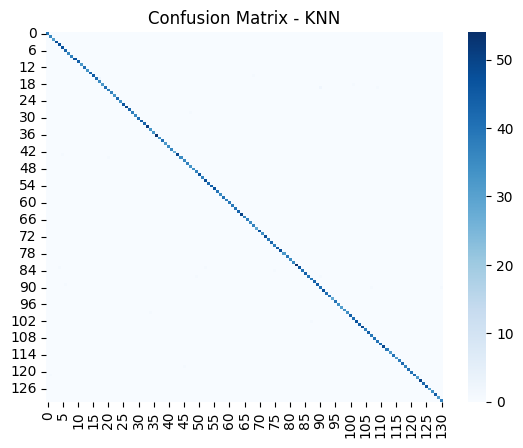

In [11]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))

print(classification_report(y_test, y_pred_knn, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


## 📈 Modèle 2 : Régression Linéaire (RidgeClassifier)

RidgeClassifier Accuracy: 0.7103053435114504
                     precision    recall  f1-score   support

     Apple Braeburn       0.62      0.87      0.72        39
 Apple Crimson Snow       0.54      0.86      0.67        36
     Apple Golden 1       0.52      0.81      0.63        31
     Apple Golden 2       0.84      0.67      0.74        48
     Apple Golden 3       0.96      0.51      0.67        47
 Apple Granny Smith       0.67      0.66      0.67        47
    Apple Pink Lady       1.00      0.56      0.72        43
        Apple Red 1       0.61      0.56      0.58        36
        Apple Red 2       0.70      0.51      0.59        37
        Apple Red 3       0.72      0.62      0.67        47
Apple Red Delicious       0.89      0.70      0.78        44
 Apple Red Yellow 1       0.73      0.94      0.82        32
 Apple Red Yellow 2       0.71      0.49      0.58        41
            Apricot       0.69      0.55      0.61        33
            Avocado       0.52      0.7

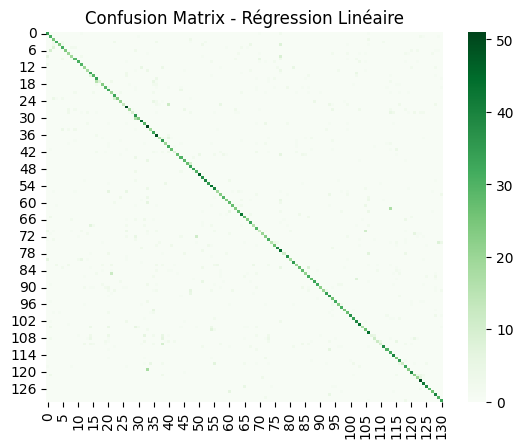

In [13]:

ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("RidgeClassifier Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge, target_names=le.classes_))
sns.heatmap(confusion_matrix(y_test, y_pred_ridge), cmap="Greens")
plt.title("Confusion Matrix - Régression Linéaire")
plt.show()


## ✅ Conclusion

Résumé des résultats
Critère	KNN	RidgeClassifier
Accuracy	✅ 0.9952 (~99.5%)	⚠️ 0.7103 (~71%)
Macro F1-score	✅ 1.00	⚠️ 0.70
Weighted F1-score	✅ 1.00	⚠️ 0.70
Stabilité par classe	Très homogène	Variable, beaucoup de classes mal reconnues
Temps d'entraînement	⚠️ Long (car paresseux)	✅ Rapide
Capacité à généraliser	Bonne mais coûteuse	Moyenne à faible

---



✅ Interprétation
🔹 KNN :
Classifie presque parfaitement toutes les classes, même dans un dataset aussi riche que Fruits 360.

F1-score, précision et rappel sont très proches de 1.00 pour toutes les classes.

❗ Inconvénient : temps de prédiction long sur de grands datasets car il doit comparer chaque nouvel échantillon à tout l’ensemble d’entraînement.

🔸 RidgeClassifier (Régression linéaire) :
Moins adapté aux images (il fait des hypothèses linéaires trop simples).

Performances très variables selon les classes.

Certaines ont un F1-score de 0.30 à 0.50.

Beaucoup de confusion entre classes visuellement proches.

✅ Bon pour tester rapidement un pipeline, mais pas le meilleur choix pour des données d’image.

🧠 Conclusion recommandée
Le modèle KNN surpasse largement la régression linéaire en termes de précision, de stabilité et de reconnaissance par classe sur le dataset Fruits 360.
Cependant, KNN est plus coûteux en mémoire et en calcul, ce qui peut être problématique à grande échelle.